# Prepare Environment
Thr first section is to import necesssary modules for this Colab notebook.

In [2]:
# Load libraries
import numpy as np
import pandas as pd

# Create a simple dataset
We first start by creating a simple, small fruit dataset, which can be used to train a decision tree.
Here, we will create the dataset using DataFrame from the Pandas library.

In [3]:
df = pd.DataFrame({
    'color': ['green','yellow','red','red','yellow'],
    'diameter': [3,3,1,1,3],
    'label': ['apple','apple','grape','grape','lemon']  # 0: Apple, 1:Grape, 2: Lemon
})
df

,color,diameter,label
0,green,3,apple
1,yellow,3,apple
2,red,1,grape
3,red,1,grape
4,yellow,3,lemon


As you can see from the output above, we have create the fruit dataset consisting of three columns: `color`, `diameter` and `label`.

The first two columns (i.e., `color` and `diameter`) are the **features** or the characteristics of each fruit, while the last column (i.e., `label`) are the **label** or the answer that we expect the decision tree to know when it accepts the color and diameter values.

# Categorical Columns

It should be emphasize that most of the ML algorithms expect numerical features (e.g., integer and floating-point numbers) as input.

However, there are two columns that are NOT numerical, which are `color` and `label`. We need to convert such columns into numerical ones. 

For categorical features (i.e., `color`), we commonly convert them into what is called **one-hot** format. We **DO NOT** use a number such as 0, 1, 2 as it brings in a natural order for different categories.

```
color=green  --> 0 --> [1, 0, 0]
color=red    --> 1 --> [0, 1, 0]
color=yellow --> 2 --> [0, 0, 1]
```

It should be noted that it **DOES NOT** matter which number you assign for `red`, `green` and `yellow` as long as they are consistent.

The following code shows an example of how to use the `get_dummies` function to convert from the categorical feature into the one-hot format.

In [4]:
pd.get_dummies(df['color'], prefix='color')

,color_green,color_red,color_yellow
0,1,0,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1


We append such one-hot features into the dataframe.

In [5]:
color_code_df = pd.get_dummies(df['color'], prefix='color')
df = pd.concat([df, color_code_df], axis=1)
df

,color,diameter,label,color_green,color_red,color_yellow
0,green,3,apple,1,0,0
1,yellow,3,apple,0,0,1
2,red,1,grape,0,1,0
3,red,1,grape,0,1,0
4,yellow,3,lemon,0,0,1


Next, we will convert the `label` column into integer numbers (e.g., 0, 1 and 2). Again, it **DOES NOT** matter which number you assign as long as you are consistent for the task.

Here we will use `LabelEncoder` from scikit-learn to convert from string to class numbers, and then create a new column, named `label_code`, to keep the output.

In [6]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
df['label_code'] = label_enc.fit_transform(df['label'])
print(label_enc.classes_)

df

['apple' 'grape' 'lemon']


,color,diameter,label,color_green,color_red,color_yellow,label_code
0,green,3,apple,1,0,0,0
1,yellow,3,apple,0,0,1,0
2,red,1,grape,0,1,0,1
3,red,1,grape,0,1,0,1
4,yellow,3,lemon,0,0,1,2


Once we have successfully convert categorical columns into numerical ones. We will drop the categorical columns from the dataframe.

In [7]:
data_df = df.drop(columns=['color','label'])
data_df

,diameter,color_green,color_red,color_yellow,label_code
0,3,1,0,0,0
1,3,0,0,1,0
2,1,0,1,0,1
3,1,0,1,0,1
4,3,0,0,1,2


# Prepare a Training Set

As mentioned in the slide that a training set consists of pairs of data (or features) and labels, we will extract features and labels from the dataframe.

We typically use `X` for features and `y` for labels.

In [8]:
# Prepare the training set
X = data_df.drop(columns=['label_code']).values
y = data_df['label_code'].values
print(X)
print(y)

[[3 1 0 0]
 [3 0 0 1]
 [1 0 1 0]
 [1 0 1 0]
 [3 0 0 1]]
[0 0 1 1 2]


The following is the code to get the name of each feature column and store in a `feature_names` variable.

In [9]:
feature_names = data_df.drop(columns=['label_code']).columns.values
feature_names

array(['diameter', 'color_green', 'color_red', 'color_yellow'],
      dtype=object)

# Train a Decision Tree

In this section, we will create and train a decision tree model using [scikit-learn](https://scikit-learn.org/), which is one of the most popular Python package for machine learning.

The module that we will use is [DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html).

In [10]:
from sklearn.tree import DecisionTreeClassifier

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(random_state=42)

To train the model, we simply call `fit` function with the training set that we have prepared: `X` and `y`.

In [11]:
# Train Decision Tree Classifer
clf = clf.fit(X,y)

# Prediction

In this section, we will use the *trained* decision tree to predict the types of fruit based on the `color` and `diameter`.

To make predictions, we call `predict` function with the input features. Let's have a try on the training set.

In [12]:
# Predict the response for test dataset
y_pred = clf.predict(X)
print(y_pred)

[0 0 1 1 0]


It can be seen that the predictions are still the class number. If we want to know the name of each class, we can use the same `LabelEncoder` to inverse the predicted class from numbers back to string.

In [13]:
print(label_enc.inverse_transform(y_pred))

['apple' 'apple' 'grape' 'grape' 'apple']


One of common metrics that we can use to evaluate the performance of the model is **accuracy**, which is the closeness of a measured value to a standard or known value.

In [14]:
np.mean(y_pred == y)

0.8

# Visualize the Trained Decision Tree

It is also helpful to understand the criteria that the model uses to make predictions. For the decision tree, we can use `export_graphviz` module to visualize the tree.

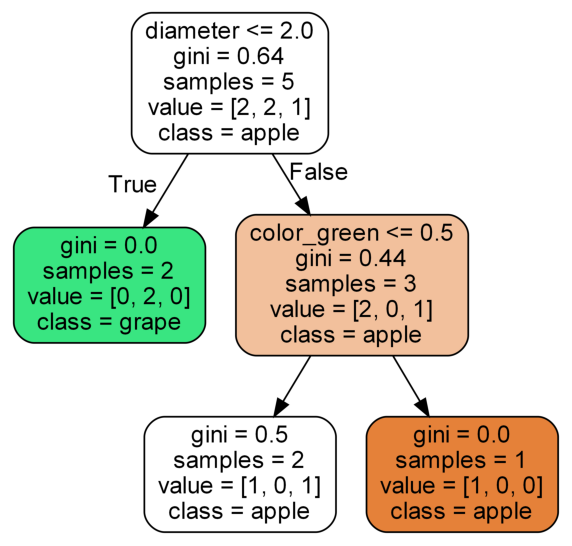

In [15]:
from sklearn.tree import export_graphviz
from subprocess import call
import matplotlib.pyplot as plt

# Export the decision tree
export_graphviz(
    clf,                             # the trained decision tree here
    feature_names=feature_names,     # the list of feature names here
    class_names=label_enc.classes_,  # the list of labels here
    out_file='tree.dot',
    rounded=True, proportion=False, precision=2, filled=True)

# Convert to png
call(['dot', '-Tpng', 'tree.dot', '-o', 'tree.png', '-Gdpi=600'])

# Display in python
plt.figure(figsize=(10,12))
plt.imshow(plt.imread('tree.png'))
plt.axis('off')
plt.show()

We can also see which are the most importance features for predicting the type of the fruit based on the `color` and the `diameter`.

Here we can use the attribute `feature_importances_` from the trained model `clf`.

In [16]:
for i in range(len(feature_names)):
    print(f'{feature_names[i]}: {clf.feature_importances_[i]}')

diameter: 0.8484848484848485
color_green: 0.15151515151515146
color_red: 0.0
color_yellow: 0.0
